In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

Loading the test set: dataframe, predicted and actual $d_{hkl}$ distances

In [2]:
df = pd.read_csv('dftest.csv')
pred = np.load('2R4P2R54_12525_predtest.npy')
y = np.load('ytest.npy')

Plotting the learning curves

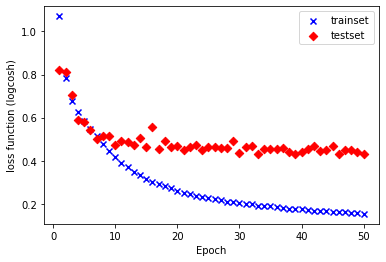

In [3]:
cf = pd.read_csv('2R4P2R54_12525.csv', header=None)
plt.figure()
plt.scatter(np.arange(1,cf.shape[0]+1), cf[0], marker='x', color='blue', label = 'trainset')
plt.scatter(np.arange(1,cf.shape[0]+1), cf[1], marker='D', color='red', label = 'testset')
plt.ylabel('loss function (logcosh)')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Computing the root-mean-squared error (RMSE) for each $d_{hkl}$ distance ($d_{100}$, $d_{010}$, $d_{001}$, $d_{110}$, $d_{101}$, and $d_{100}$):

In [4]:
((y - pred)**2).mean(axis=0)**0.5

array([3.0207412 , 1.19397809, 0.75993504, 1.0482399 , 0.69450216,
       0.72958753])

Calculating the global RMSE:

In [5]:
rmse = ((y - pred)**2).mean()**0.5

In [6]:
rmse

1.4855638913250166

Checking the proportion of the assessments with an error within one RMSE:

In [7]:
(((y-pred)**2).mean(axis=1)**0.5 <= rmse).sum()/y.shape[0]

0.7830623306233062

Plots for interplanar distance $d_{100}$
RMSE 3.0207 angstrom
MAPE: 11.4214 %


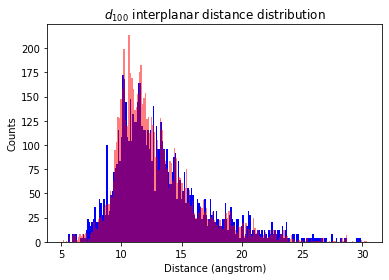

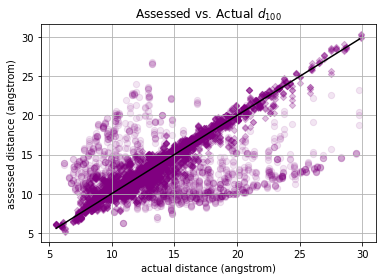

Plots for interplanar distance $d_{010}$
RMSE 1.194 angstrom
MAPE: 8.5312 %


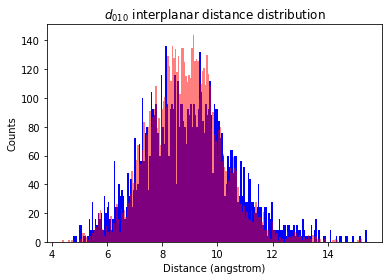

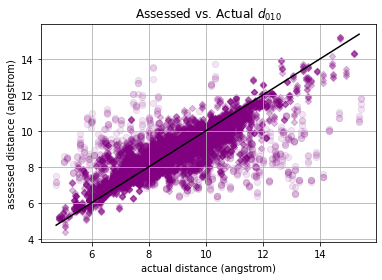

Plots for interplanar distance $d_{001}$
RMSE 0.7599 angstrom
MAPE: 8.6881 %


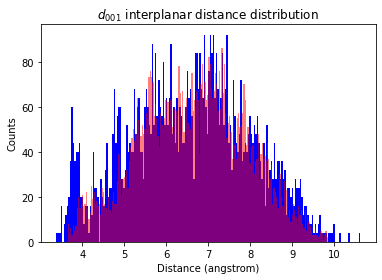

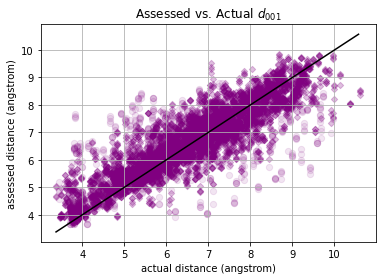

Plots for interplanar distance $d_{110}$
RMSE 1.0482 angstrom
MAPE: 10.5991 %


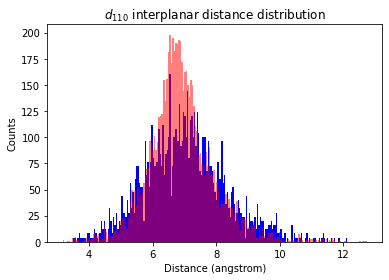

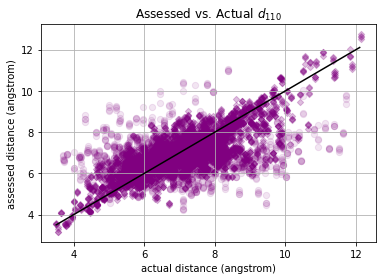

Plots for interplanar distance $d_{101}$
RMSE 0.6945 angstrom
MAPE: 9.4108 %


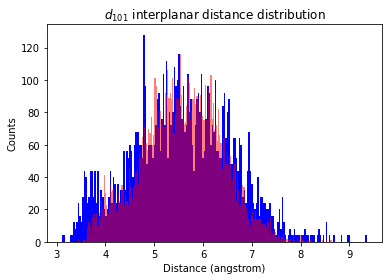

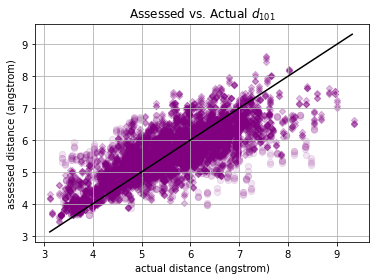

Plots for interplanar distance $d_{011}$
RMSE 0.7296 angstrom
MAPE: 10.6101 %


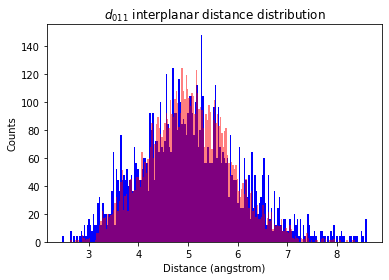

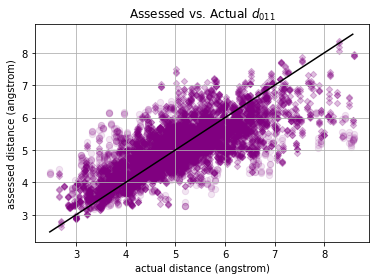

In [8]:
rmses = dict()

condl = ((y-pred)**2).mean(axis=1)**0.5 <= 1*rmse
condl = np.argwhere(condl)[:,0]

condg = ((y-pred)**2).mean(axis=1)**0.5 > 1*rmse
condg = np.argwhere(condg)[:,0]

dhkl = {0:r'$d_{100}$', 1:r'$d_{010}$', 2:r'$d_{001}$', 
        3:r'$d_{110}$', 4:r'$d_{101}$', 5:r'$d_{011}$'}

for j in range(y.shape[-1]):
    
    rmses[j] = ((y[:,j]-pred[:,j])**2).mean()**0.5
    mape = 100*abs(y[:,j]-pred[:,j])/(y[:,j])
    
    print('Plots for interplanar distance', dhkl[j])
    print('RMSE', rmses[j].round(4), 'angstrom')
    print('MAPE:',mape.mean().round(4), '%')

    df['y' + str(j)] = y[:,j]
    df['p' + str(j)] = pred[:,j]
    df['diff' + str(j)] = abs(y[:,j]-pred[:,j])

    plt.figure()
    plt.title(dhkl.get(j, None) + ' interplanar distance distribution')
    plt.hist(y[:,j], bins=200, color='blue')
    plt.hist(pred[:,j], bins = 200, color = 'red', alpha = 0.5 )
    plt.ylabel('Counts')
    plt.xlabel('Distance (angstrom)')
    plt.show()
    
    plt.figure()
    plt.title('Assessed vs. Actual ' + dhkl.get(j, None))
    plt.scatter(y[condl,j],pred[condl,j], marker='D', color='purple', s=20, alpha=0.25)
    plt.scatter(y[condg,j],pred[condg,j], marker='o', color='purple', s=40, alpha=0.10)
    plt.ylabel('assessed distance (angstrom)')
    plt.xlabel('actual distance (angstrom)')
    plt.grid(True)
    plt.plot(np.arange(y[:,j].min(), y[:,j].max(),0.1), np.arange(y[:,j].min(), y[:,j].max(),0.1), color='black')
    plt.show()
    

Plot of the error distribution

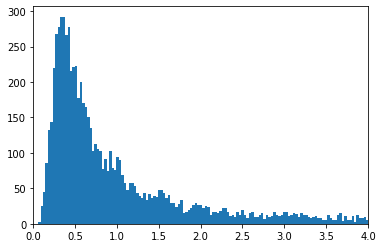

In [9]:
plt.figure()
plt.hist(((y-pred)**2).mean(axis=1)**0.5, 200)
plt.xlim(0,4)
plt.show()

Calculating the mean RMSE for each assessment. Appending the results in the dataframe

In [10]:
df['rmse'] = ((y-pred)**2).mean(axis=1)**0.5

unsam = df.shape[0]//4
df.iloc[:unsam,:].sort_values(by='rmse').to_csv('comparison_macro_predictions.csv', index=None)

In [11]:
df

,name,sgnum,y0,p0,diff0,y1,p1,diff1,y2,p2,...,y3,p3,diff3,y4,p4,diff4,y5,p5,diff5,rmse
0,4508154,4,13.967982,14.536134,0.568151,11.851600,11.501485,0.350115,5.060856,5.379892,...,9.036960,8.674311,0.362649,4.608352,4.976938,0.368586,4.654273,4.769423,0.115150,0.371437
1,2015376,14,15.580000,16.087391,0.507391,10.736209,10.923647,0.187438,3.780874,4.252824,...,8.840469,9.210733,0.370264,3.674232,4.098389,0.424157,3.495663,3.855079,0.359416,0.400313
2,7112158,2,13.153855,13.065833,0.088022,8.873011,9.069343,0.196331,8.312688,8.575601,...,6.839929,7.801633,0.961704,6.631208,7.547454,0.916246,5.817627,6.964695,1.147068,0.729790
3,2103707,14,11.360324,10.360665,0.999659,7.677181,8.662399,0.985218,7.225000,6.762657,...,5.759477,6.218759,0.459282,6.096498,5.573822,0.522676,5.261444,5.220312,0.041132,0.667028
4,4022534,4,10.275040,10.285652,0.010612,9.330000,9.014400,0.315601,8.044606,7.851980,...,6.907302,6.725412,0.181890,5.962946,6.134336,0.171389,6.092580,5.654150,0.438430,0.255441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,4508987,2,14.439140,14.677630,0.238490,8.967385,8.585822,0.381563,6.005630,6.288383,...,8.515356,7.261212,1.254144,5.658073,5.642344,0.015729,5.409076,4.918616,0.490460,0.591057
7376,7203856,2,10.143920,13.657888,3.513969,6.608419,7.358314,0.749894,5.748573,6.041023,...,5.052123,6.379704,1.327581,4.948635,5.444916,0.496281,3.878017,4.423535,0.545518,1.596987
7377,4106398,4,13.315091,13.569555,0.254464,9.801565,9.642081,0.159483,9.645800,8.960882,...,7.455903,7.873043,0.417139,7.811470,7.501765,0.309705,6.875020,6.758152,0.116868,0.374807
7378,2219226,4,12.914854,13.000969,0.086115,8.289500,7.446187,0.843314,6.027814,5.601780,...,6.976118,6.342160,0.633959,5.034684,5.074541,0.039857,4.875166,4.317838,0.557329,0.518685
